In [ ]:
!pip -q install utm

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium
import utm

In [ ]:
DATA=pd.read_csv('/content/drive/MyDrive/DATA-LUAN_VAN/new_clean_bo3.csv',encoding='utf-8', converters={'p_start':eval,'p_temp':eval,'p_end':eval}, index_col=0)
DATA

,index,vehicle_id,p_start,p_temp,p_end,pre_routes,freq,label,regions
0,0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'thảo_điền')",121,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_..."
1,16,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.73100000000001, 10.7996)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'cầu_sài_gòn_1')",305,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_..."
2,21,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.721, 10.7981)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'điện_biên_phủ')",522,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_..."
3,40,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.695, 10.7912)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'võ_thị_sáu')",250,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_..."
4,50,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.68799999999999, 10.7858)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'nam_kỳ_khởi_...",127,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_..."
...,...,...,...,...,...,...,...,...,...
14856,7272177,100000533,"(106.682, 10.822000000000001)","(106.679, 10.8284)","(106.677, 10.8429)","('nguyễn_kiệm', 'nguyễn_oanh', 'hẻm_309_nguyễn...",14,True,"('phường_3_none', 'phường_7_none', 'phường_17_..."
14857,7272544,100000533,"(106.682, 10.8224)","(106.68, 10.8272)","(106.679, 10.8515)","('pham_ngũ_lão', 'quang_trung', 'hà_huy_giáp')",12,True,"('phường_4_none', 'phường_7_none', 'phường_thạ..."
14858,7272961,100000533,"(106.682, 10.8237)","(106.679, 10.8284)","(106.677, 10.8429)","('hẻm_35_phạm_ngũ_lão', 'nguyễn_oanh', 'hẻm_30...",14,True,"('phường_7_none', 'phường_7_none', 'phường_17_..."
14859,7274155,100000533,"(106.68, 10.8272)","(106.677, 10.8429)","(106.677, 10.8432)","('quang_trung', 'hẻm_309_nguyễn_oanh', 'nguyễn...",14,True,"('phường_7_none', 'phường_17_none', 'phường_17..."


In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14861 entries, 0 to 14860
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       14861 non-null  int64 
 1   vehicle_id  14861 non-null  int64 
 2   p_start     14861 non-null  object
 3   p_temp      14861 non-null  object
 4   p_end       14861 non-null  object
 5   pre_routes  14861 non-null  object
 6   freq        14861 non-null  int64 
 7   label       14861 non-null  bool  
 8   regions     14861 non-null  object
dtypes: bool(1), int64(3), object(5)
memory usage: 1.0+ MB


In [ ]:
DATA['START_LAT']= None
DATA['START_LON']=None
DATA['MID_LAT']=None
DATA['MID_LON']=None
DATA['END_LAT']=None
DATA['END_LON']=None

In [ ]:
DATA

In [ ]:
distance = lambda x_dif, y_dif: np.sqrt(x_dif**2 + y_dif**2)

In [ ]:
START_LAT=[]
START_LON=[]
MID_LAT=[]
MID_LON=[]
END_LAT=[]
END_LON=[]
for index, row in DATA.iterrows():
  START_LAT.append(row['p_start'][1])
  START_LON.append(row['p_start'][0])
  MID_LAT.append(row['p_temp'][1])
  MID_LON.append(row['p_temp'][0])
  END_LAT.append(row['p_end'][1])
  END_LON.append(row['p_end'][0])
  # print(str(row['p_start']).replace('(','').replace(')','').split(','))
  val=str(row['p_start']).replace('(','').replace(')','').split(',')
  # print(val[0])
#   print(row['p_start'][1])

  # row['START_LON']=float(val[0])
  # val=str(row['p_temp']).replace('(','').replace(')','').split(',')
  # row['MID_LAT']=float(val[1])
  # row['MID_LON']=float(val[0])
  # val=str(row['p_temp']).replace('(','').replace(')','').split(',')
  # row['END_LAT']=float(val[1])
  # row['END_LON']=float(val[0])

DATA['START_LAT']=START_LAT
DATA['START_LON']=START_LON
DATA['MID_LAT']=MID_LAT
DATA['MID_LON']=MID_LON
DATA['END_LAT']=END_LAT
DATA['END_LON']=END_LON
# write data to csv file ..



No handles with labels found to put in legend.


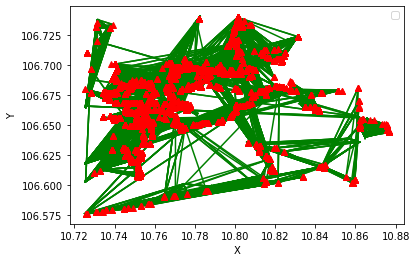

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
i =0
router=''
for index, row in DATA.iterrows():
  # if row['pre_routes']==router:
  #   continue
  router=row['pre_routes']
  # if i==2:
  #   break
  # plt.plot([row['START_LAT'],row['MID_LAT'],[row['END_LAT']], [row['START_LON'],row['MID_LON'],row['END_LON']],'bD--'),label=row['pre_routes']
  if row['label']==True:
    corlor='r^'
    # plt.plot([row['START_LAT'],row['MID_LAT'],row['END_LAT']], [row['START_LON'],row['MID_LON'],row['END_LON']],'red')
  else:
    corlor='green'

  plt.plot([row['START_LAT'],row['MID_LAT'],row['END_LAT']], [row['START_LON'],row['MID_LON'],row['END_LON']],corlor)
  i=i+1
plt.xlabel('X')
plt.ylabel('Y')
plt.title='router'
plt.legend(loc='best')
plt.plot()
plt.show()

In [ ]:
import utm
lat, lon = DATA.START_LAT.values, DATA.START_LON.values
x = utm.from_latlon(lat, lon)
DATA['START_UTMX'] = x[0]
DATA['START_UTMY'] = x[1]

lat, lon = DATA.MID_LAT.values, DATA.MID_LON.values
x = utm.from_latlon(lat, lon)
DATA['MID_UTMX'] = x[0]
DATA['MID_UTMY'] = x[1]

lat, lon = DATA.END_LAT.values, DATA.END_LON.values
x = utm.from_latlon(lat, lon)
DATA['END_UTMX'] = x[0]
DATA['END_UTMY'] = x[1]
DATA

,index,vehicle_id,p_start,p_temp,p_end,pre_routes,freq,label,regions,START_LAT,...,MID_LAT,MID_LON,END_LAT,END_LON,START_UTMX,START_UTMY,MID_UTMX,MID_UTMY,END_UTMX,END_UTMY
0,0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'thảo_điền')",121,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...",10.8014,...,10.8012,106.739,10.8012,106.738,690237.768472,1.194562e+06,690128.530855,1.194539e+06,690019.167344,1.194538e+06
1,16,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.73100000000001, 10.7996)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'cầu_sài_gòn_1')",305,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...",10.8014,...,10.8012,106.739,10.7996,106.731,690237.768472,1.194562e+06,690128.530855,1.194539e+06,689254.626566,1.194357e+06
2,21,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.721, 10.7981)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'điện_biên_phủ')",522,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...",10.8014,...,10.8012,106.739,10.7981,106.721,690237.768472,1.194562e+06,690128.530855,1.194539e+06,688161.926480,1.194185e+06
3,40,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.695, 10.7912)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'võ_thị_sáu')",250,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...",10.8014,...,10.8012,106.739,10.7912,106.695,690237.768472,1.194562e+06,690128.530855,1.194539e+06,685322.718681,1.193406e+06
4,50,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.68799999999999, 10.7858)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'nam_kỳ_khởi_...",127,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...",10.8014,...,10.8012,106.739,10.7858,106.688,690237.768472,1.194562e+06,690128.530855,1.194539e+06,684560.461306,1.192804e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,7272177,100000533,"(106.682, 10.822000000000001)","(106.679, 10.8284)","(106.677, 10.8429)","('nguyễn_kiệm', 'nguyễn_oanh', 'hẻm_309_nguyễn...",14,True,"('phường_3_none', 'phường_7_none', 'phường_17_...",10.8220,...,10.8284,106.679,10.8429,106.677,683882.223027,1.196805e+06,683550.267053,1.197511e+06,683322.738390,1.199114e+06
14857,7272544,100000533,"(106.682, 10.8224)","(106.68, 10.8272)","(106.679, 10.8515)","('pham_ngũ_lão', 'quang_trung', 'hà_huy_giáp')",12,True,"('phường_4_none', 'phường_7_none', 'phường_thạ...",10.8224,...,10.8272,106.680,10.8515,106.679,683881.979074,1.196849e+06,683660.348913,1.197379e+06,683536.181091,1.200066e+06
14858,7272961,100000533,"(106.682, 10.8237)","(106.679, 10.8284)","(106.677, 10.8429)","('hẻm_35_phạm_ngũ_lão', 'nguyễn_oanh', 'hẻm_30...",14,True,"('phường_7_none', 'phường_7_none', 'phường_17_...",10.8237,...,10.8284,106.679,10.8429,106.677,683881.186163,1.196993e+06,683550.267053,1.197511e+06,683322.738390,1.199114e+06
14859,7274155,100000533,"(106.68, 10.8272)","(106.677, 10.8429)","(106.677, 10.8432)","('quang_trung', 'hẻm_309_nguyễn_oanh', 'nguyễn...",14,True,"('phường_7_none', 'phường_17_none', 'phường_17...",10.8272,...,10.8429,106.677,10.8432,106.677,683660.348913,1.197379e+06,683322.738390,1.199114e+06,683322.555622,1.199147e+06


In [ ]:
# Function to calculate distance between two points
distance = lambda x_dif, y_dif: np.sqrt(x_dif**2 + y_dif**2)

In [ ]:
# Differencing UTM coordinates
DATA['START_UTMX_diff'] = DATA.groupby('vehicle_id').START_UTMX.diff().fillna(0)
DATA['START_UTMY_diff'] = DATA.groupby('vehicle_id').START_UTMY.diff().fillna(0)

# Calculate step distance
DATA['START_distance'] = distance(DATA.START_UTMX, DATA.START_UTMY)

DATA['MID_UTMX_diff'] = DATA.groupby('vehicle_id').MID_UTMX.diff().fillna(0)
DATA['MID_UTMY_diff'] = DATA.groupby('vehicle_id').MID_UTMY.diff().fillna(0)

# Calculate step distance
DATA['MID_distance'] = distance(DATA.MID_UTMX, DATA.MID_UTMY)

DATA['END_UTMX_diff'] = DATA.groupby('vehicle_id').END_UTMX.diff().fillna(0)
DATA['END_UTMY_diff'] = DATA.groupby('vehicle_id').END_UTMY.diff().fillna(0)

# Calculate step distance
DATA['END_distance'] = distance(DATA.END_UTMX, DATA.END_UTMY)
DATA

,index,vehicle_id,p_start,p_temp,p_end,pre_routes,freq,label,regions,START_LAT,...,END_UTMY,START_UTMX_diff,START_UTMY_diff,START_distance,MID_UTMX_diff,MID_UTMY_diff,MID_distance,END_UTMX_diff,END_UTMY_diff,END_distance
0,0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'thảo_điền')",121,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...",10.8014,...,1.194538e+06,0.000000,0.000000,1.379640e+06,0.000000,0.000000,1.379565e+06,0.000000,0.000000,1.379510e+06
1,16,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.73100000000001, 10.7996)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'cầu_sài_gòn_1')",305,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...",10.8014,...,1.194357e+06,0.000000,0.000000,1.379640e+06,0.000000,0.000000,1.379565e+06,-764.540778,-181.330455,1.378971e+06
2,21,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.721, 10.7981)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'điện_biên_phủ')",522,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...",10.8014,...,1.194185e+06,0.000000,0.000000,1.379640e+06,0.000000,0.000000,1.379565e+06,-1092.700085,-172.098553,1.378276e+06
3,40,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.695, 10.7912)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'võ_thị_sáu')",250,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...",10.8014,...,1.193406e+06,0.000000,0.000000,1.379640e+06,0.000000,0.000000,1.379565e+06,-2839.207799,-779.123784,1.376185e+06
4,50,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.68799999999999, 10.7858)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'nam_kỳ_khởi_...",127,False,"('phường_thảo_điền_quận_2', 'phường_thảo_điền_...",10.8014,...,1.192804e+06,0.000000,0.000000,1.379640e+06,0.000000,0.000000,1.379565e+06,-762.257375,-601.547786,1.375284e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,7272177,100000533,"(106.682, 10.822000000000001)","(106.679, 10.8284)","(106.677, 10.8429)","('nguyễn_kiệm', 'nguyễn_oanh', 'hẻm_309_nguyễn...",14,True,"('phường_3_none', 'phường_7_none', 'phường_17_...",10.8220,...,1.199114e+06,-110.207254,154.256263,1.378418e+06,0.000000,0.000000,1.378867e+06,0.000000,0.000000,1.380146e+06
14857,7272544,100000533,"(106.682, 10.8224)","(106.68, 10.8272)","(106.679, 10.8515)","('pham_ngũ_lão', 'quang_trung', 'hà_huy_giáp')",12,True,"('phường_4_none', 'phường_7_none', 'phường_thạ...",10.8224,...,1.200066e+06,-0.243954,44.245514,1.378457e+06,110.081860,-132.134095,1.378807e+06,213.442701,952.483768,1.381079e+06
14858,7272961,100000533,"(106.682, 10.8237)","(106.679, 10.8284)","(106.677, 10.8429)","('hẻm_35_phạm_ngũ_lão', 'nguyễn_oanh', 'hẻm_30...",14,True,"('phường_7_none', 'phường_7_none', 'phường_17_...",10.8237,...,1.199114e+06,-0.792911,143.797927,1.378581e+06,-110.081860,132.134095,1.378867e+06,-213.442701,-952.483768,1.380146e+06
14859,7274155,100000533,"(106.68, 10.8272)","(106.677, 10.8429)","(106.677, 10.8432)","('quang_trung', 'hẻm_309_nguyễn_oanh', 'nguyễn...",14,True,"('phường_7_none', 'phường_17_none', 'phường_17...",10.8272,...,1.199147e+06,-220.837250,385.942644,1.378807e+06,-227.528663,1602.693661,1.380146e+06,-0.182768,33.184097,1.380175e+06


In [ ]:
import csv
header=DATA.columns
with open('/content/drive/MyDrive/DATA-LUAN_VAN/data_gps.csv', 'w', encoding='UTF8') as f:
  writer = csv.writer(f)
  writer.writerow(header)
  for index, row in DATA.iterrows():
    # write a row to the csv file
    writer.writerow(row)

In [ ]:
df_grouped1 = DATA.groupby('vehicle_id')[['label']].max()
df_grouped1

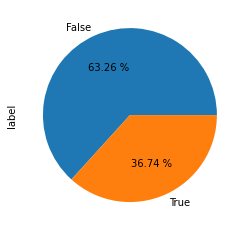

In [ ]:
DATA.label.value_counts().plot.pie(autopct='%.2f %%')
# DATA.label.value_counts().plot.pie()

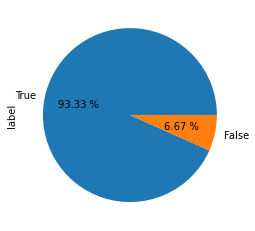

In [ ]:
df_grouped1.label.value_counts().plot.pie(autopct='%.2f %%')

In [ ]:
POINTS1=[]
POINTS0=[]
for index, row in DATA.iterrows():
  if row['label'] ==True:
    POINTS1.append([row['START_LAT'],row['START_LON']])
    POINTS1.append([row['MID_LAT'],row['MID_LON']])
    POINTS1.append([row['END_LAT'],row['END_LON']])
  else:
    POINTS0.append([row['START_LAT'],row['START_LON']])
    POINTS0.append([row['MID_LAT'],row['MID_LON']])
    POINTS0.append([row['END_LAT'],row['END_LON']])
# POINTS1
# POINTS0
print(len(POINTS1))
print(len(POINTS0))

16380
28203


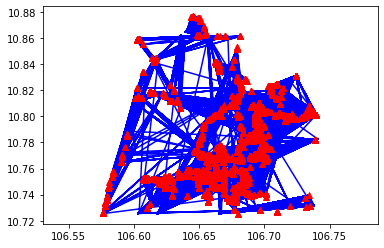

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(POINTS0)[:, 1], np.array(POINTS0)[:, 0], 'b')
plt.plot(np.array(POINTS1)[:, 1], np.array(POINTS1)[:, 0], 'r^')
plt.axis('equal')
plt.plot()
plt.show()


In [ ]:

import matplotlib.pyplot as plt
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    # X3 = X[label == 3, :]
    plt.plot(X1[:, 0], X1[:, 1], 'go')
    plt.plot(X0[:, 0], X0[:, 1], 'b^')
    # plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    # plt.plot(X3[:, 0], X3[:, 1], 'g^', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

In [ ]:
def getDataById(Id):
  df=DATA[DATA.vehicle_id==Id]
  POINTS=[]
  LABLE=[]
  for index, row in DATA.iterrows():
    if row['label']==True:
      LABLE.append(1)
    else:
      LABLE.append(0)

    POINTS.append([row['START_LAT'],row['START_LON']])
    POINTS.append([row['MID_LAT'],row['MID_LON']])
    POINTS.append([row['END_LAT'],row['END_LON']])
  return POINTS,LABLE

Centers found by scikit-learn:
[[ 10.75623754 106.65739492]
 [ 10.80167311 106.69569471]]


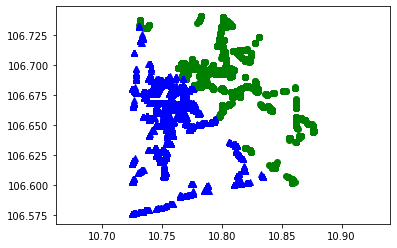

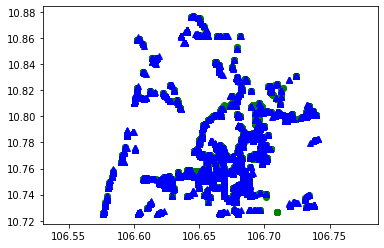

In [ ]:
points,labels=getDataById(100000095)
X=np.array(points)
Y=np.array(labels)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)
# kmeans_display(X, Y)
# pred_label
# Y
plt.plot(np.array(POINTS1)[:, 1], np.array(POINTS1)[:, 0], 'go')
plt.plot(np.array(POINTS0)[:, 1], np.array(POINTS0)[:, 0], 'b^')

plt.axis('equal')
plt.plot()
plt.show()


In [ ]:

my_map = folium.Map(location=[10.77435755, 106.67266913], zoom_start=16)
df=DATA[DATA.vehicle_id == 100000095]
# df=DATA
# [DATA.vehicle_id==100000025]
# df
# Define different colors for status
for index, row in df.iterrows():
  if row.label== True:
    color = 'red'
    radius=3
  else:
    color = 'green'
    radius=6

  folium.CircleMarker([row['MID_LAT'], row['MID_LON']],
                      radius=radius, color=color,
                      fill=True,fill_opacity=0.7,parse_html=False).add_to(my_map)
  folium.CircleMarker([row['END_LAT'], row['END_LON']],
                      radius=radius, color=color,
                      fill=True,fill_opacity=0.7,parse_html=False).add_to(my_map)
  folium.CircleMarker([row['START_LAT'], row['START_LON']],
                      radius=radius, color=color,
                      fill=True).add_to(my_map)


display(my_map)